In [50]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# 中文适配
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


def plot_scalar_field(scalar_func, x_range=(-5, 5), y_range=(-5, 5), z_range=None, resolution=100):
    """
    在三维空间中绘制平面的标量场

    参数:
        scalar_func: 函数，接受x和y坐标并返回标量值
        x_range: 元组，x轴范围，默认为(-5, 5)
        y_range: 元组，y轴范围，默认为(-5, 5)
        z_range: 元组，z轴范围，默认为None（自动计算）

    返回:
        fig, ax: matplotlib的Figure和Axes对象
    """
    # 创建坐标网格
    x = np.linspace(x_range[0], x_range[1], resolution)
    y = np.linspace(y_range[0], y_range[1], resolution)
    X, Y = np.meshgrid(x, y)

    # 计算标量场的值
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = scalar_func(X[i, j], Y[i, j])

    # 如果指定了z轴范围，对数据进行截断处理
    if z_range is not None:
        # 创建掩码数组，标记哪些点超出z轴范围
        mask = (Z >= z_range[0]) & (Z <= z_range[1])

        # 创建截断后的数组，用于保存符合z轴范围的数据点
        X_masked = X.copy()
        Y_masked = Y.copy()
        Z_masked = Z.copy()

        # 将超出范围的值替换为NaN，matplotlib会自动不绘制这些点
        Z_masked[~mask] = np.nan

        # 使用截断后的数据进行绘图
        X_plot, Y_plot, Z_plot = X_masked, Y_masked, Z_masked
    else:
        # 不需要截断，使用原始数据
        X_plot, Y_plot, Z_plot = X, Y, Z

    # 创建3D图形
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # 绘制表面（使用处理后的数据）
    surf = ax.plot_surface(X_plot, Y_plot, Z_plot, cmap=cm.viridis, alpha=0.8)

    # 设置坐标轴标签
    ax.set_xlabel('X轴')
    ax.set_ylabel('Y轴')
    ax.set_zlabel('标量值')

    # 设置标题
    ax.set_title('平面标量场的3D可视化 (3D Visualization of Scalar Field)')

    # 设置z轴范围（如果指定）
    if z_range is not None:
        ax.set_zlim(z_range)

    # 添加颜色条
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

    # 显示图形
    plt.show()

    return fig, ax


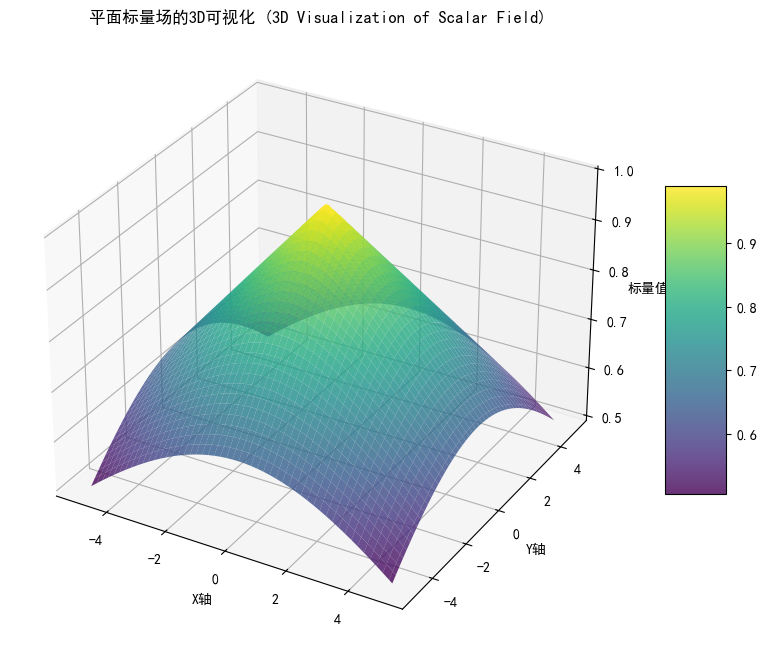

(<Figure size 1000x800 with 2 Axes>,
 <Axes3D: title={'center': '平面标量场的3D可视化 (3D Visualization of Scalar Field)'}, xlabel='X轴', ylabel='Y轴', zlabel='标量值'>)

In [51]:
def u(x, y):
    distance = np.sqrt(x ** 2 + y ** 2)
    max_possible_distance = np.sqrt(10 ** 2 + 10 ** 2)
    normalized_distance = 1 - (distance / max_possible_distance)
    return normalized_distance


plot_scalar_field(u, x_range=(-5, 5), y_range=(-5, 5))

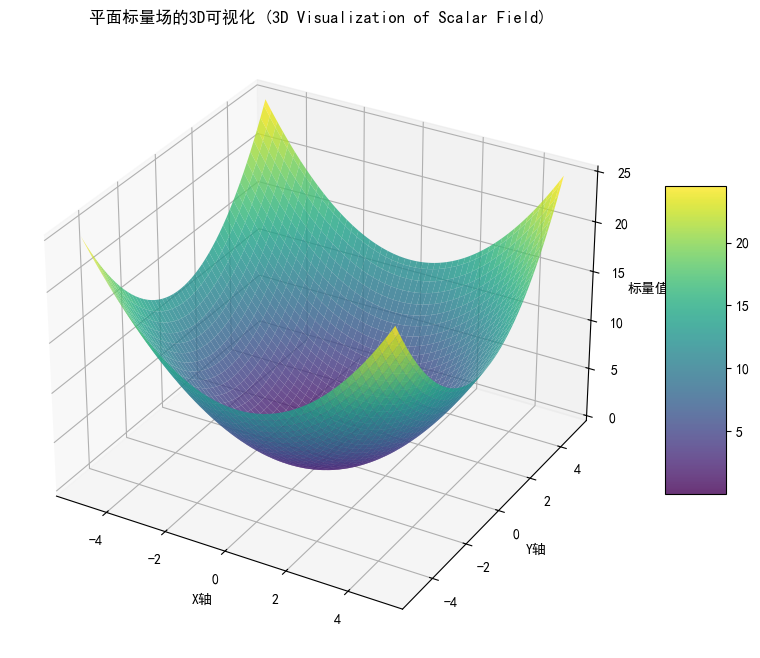

(<Figure size 1000x800 with 2 Axes>,
 <Axes3D: title={'center': '平面标量场的3D可视化 (3D Visualization of Scalar Field)'}, xlabel='X轴', ylabel='Y轴', zlabel='标量值'>)

In [52]:
def u_1(x, y):
    return 0.5 * (x ** 2 + y ** 2)


plot_scalar_field(u_1, x_range=(-5, 5), y_range=(-5, 5))

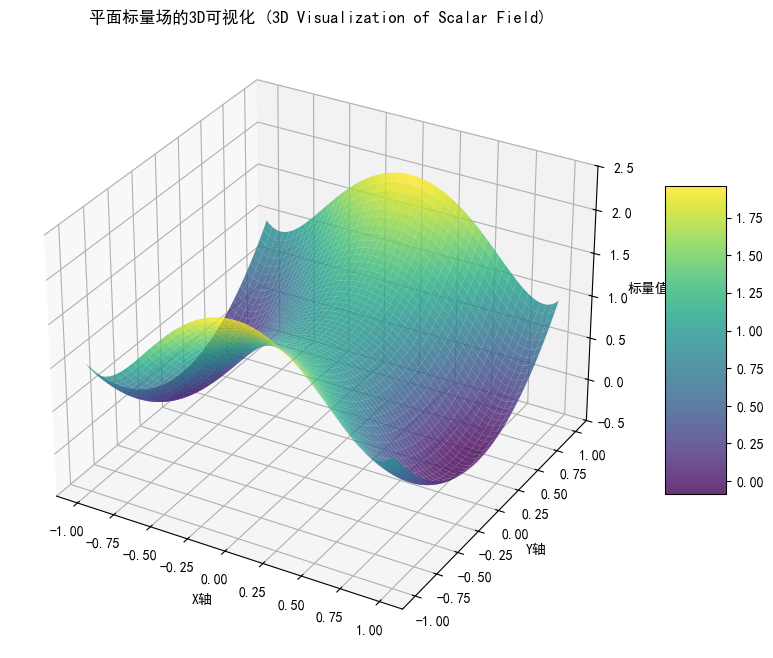

(<Figure size 1000x800 with 2 Axes>,
 <Axes3D: title={'center': '平面标量场的3D可视化 (3D Visualization of Scalar Field)'}, xlabel='X轴', ylabel='Y轴', zlabel='标量值'>)

In [57]:
def u_2(x, y):
    return 1+(y**2)-(2*(x**2))+(x**6)

plot_scalar_field(u_2, x_range=(-1, 1), y_range=(-1, 1), z_range=(-0.5, 2.5), resolution=3000)